# Course Project: Image Analysis for cancer risk assessment (8QA01)


Welcome to the project of 8QA01! This notebook contains the steps to go through the images, measure features and display measurements, using functions in the utilities_8qa01.py module. You can add extend this by adding more functions in the module, and calling them from this notebook.


Before you start, don't forget to:

- Read the README.md file in this repository
- Do the "Getting started" [essential skills](https://github.com/tueimage/essential-skills) tutorial on Python



# Step-by-step project walkthrough

## 0. Import required python packages

These packages contain different functionality, for example matplotlib.pyplot is useful for various visualisation techniques. You can import more packages than these, as long as they are common Python packages, or you include them with your code. 


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Groep_05_functions as util
from skimage import morphology
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score

## 1. Specify data locations

Change the dataFile variable according to the image set you are using 

In [2]:
dataFile = 'class2020_group05_labels.xlsx'
imagePath = 'C:\\Users\Administrator\Documents\OGO beeldanalyse\Onze data'
maskPath = 'C:\\Users\Administrator\Documents\OGO beeldanalyse\Onze data maskers'

## 2. Load data

In [3]:
dframe = pd.read_excel(dataFile)

#print(dframe)

## 3. Initialise variables

In [4]:
ID = list(dframe['id'])
Melanoma = np.array(dframe['melanoma'])
numImages = len(ID)
featuresBorder = np.empty([numImages,1])
featuresBorder[:] = np.nan
featuresColor = np.empty([numImages,1])
featuresColor[:] = np.nan


## 4. Measure features for all images

In [6]:
for i in np.arange(numImages):
    
    # Define filenames related to this image
    imFile = imagePath + os.sep + ID[i] + '.jpg'
    maskFile = maskPath + os.sep + ID[i] + '_segmentation.png'
    
    # Read the images with these filenames
    im = plt.imread(imFile)
    mask = plt.imread(maskFile)
    
    # Measure features
    border_score, border = util.border_evaluation(mask)
    color_score = util.color_cluster_evaluation(im, mask)
    # xx, yy, zz = util.measureYourOwnFeatures(mask)
    
    # Store in the variables we created before
    featuresBorder[i,0] = border_score
    featuresColor[i,0] = color_score
    # featuresOther[i,0] = xx

## 5. Save measured data

In [7]:
outfile = 'group2020_05_automatic.csv'
outdata = {"id": ID, 
           "border": featuresBorder.flatten(),
           "color": featuresColor.flatten()}

dframe_out = pd.DataFrame(outdata)
dframe_out.to_csv(outfile, index=False)

## 6. Display measured data

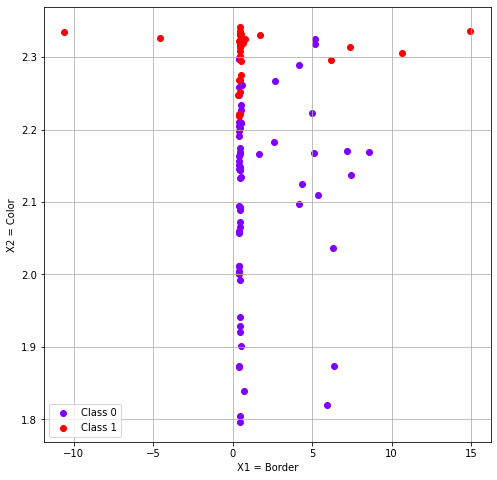

In [8]:
# Load the data you saved, then do some analysis
outfile = 'group2020_05_automatic.csv'
dframe = pd.read_csv(outfile)
ID = list(dframe['id'])
featuresBorder = np.array(dframe['border'])
featuresColor = np.array(dframe['color'])

# Display the features measured in a scatterplot
axs = util.scatter_data(featuresBorder, featuresColor, Melanoma)
axs.set_xlabel('X1 = Border')
axs.set_ylabel('X2 = Color')
axs.legend()

## 7. Predict labels using measurements

In [9]:
#Define K's that are tested on the validation set and the number of the current fold
Validation_K = [1, 2, 3, 4, 5, 6, 7, 8]
curr_fold = 0
# Load features
X = dframe.iloc[:,1:].to_numpy()
# Load labels
y = Melanoma

# Split dataset into 5 different dataset folds for cross-validation
kf = StratifiedShuffleSplit(n_splits=5, test_size=0.4, random_state=1)
# Predict labels for each fold using the KNN algortihm
for train_index, test_val_index in kf.split(X, y):
    best_K = 0
    # Define accuracy score and predictions for test set
    Acc_Score = 0
    y_pred_test = 0
    # split dataset into a train, validation and test dataset
    test_index , val_index = np.split(test_val_index, 2)
    X_train, X_val, X_test = X[train_index], X[val_index], X[test_index]
    y_train, y_val, y_test = y[train_index], y[val_index], y[test_index]
    # Generate predictions using knn_classifier for every K
    for K in Validation_K:
        y_pred_val, y_pred_test_curr = util.knn_classifier(X_train, y_train, X_val, X_test, K)
        Curr_Acc = accuracy_score(y_val,y_pred_val)
        # If accuracy of the predictions on the validation set is larger than the current accuracy, save predictions
        # for test set
        if Curr_Acc > Acc_Score:
            Acc_Score = Curr_Acc
            y_pred_test = y_pred_test_curr
            best_K = K
    # Add 1 to the number of the current fold and print the accuracy on the test set for the current fold
    curr_fold += 1
    test_acc = accuracy_score(y_test,y_pred_test)
    print('Accuracy of predictions on test set of fold '+ str(curr_fold)+ ': ' + str(test_acc))
    print('Accuracy of validation set was '+ str(Acc_Score) + ' with K: '+str(best_K))

Accuracy of predictions on test set of fold 1: 0.8
Accuracy of validation set was 0.8 with K: 3
Accuracy of predictions on test set of fold 2: 0.7
Accuracy of validation set was 0.85 with K: 3
Accuracy of predictions on test set of fold 3: 0.95
Accuracy of validation set was 0.8 with K: 8
Accuracy of predictions on test set of fold 4: 0.85
Accuracy of validation set was 0.85 with K: 1
Accuracy of predictions on test set of fold 5: 0.7
Accuracy of validation set was 1.0 with K: 2
